Vengono impostate l'altezza del trapezio(distanza_verticale) e il numero di righe e colonne

Poiché la matrice che otterremo sarà simmetrica rispetto alla colonna centrale, con la parte sinistra negativa e la parte destra positiva, ho ragionato su una matrice più semplice di 8 righe e 4 colonne

ho definito i due vettori lunghezza[] e larghezza[];
lunghezza[] contiene tutte le porzioni di altezza del trapezio(da 0cm a 90cm escluso perché ho supposto che il robot si debba fermare un po prima della palla, quindi la distanza lungo y é calcolata sempre in maniera conservativa)

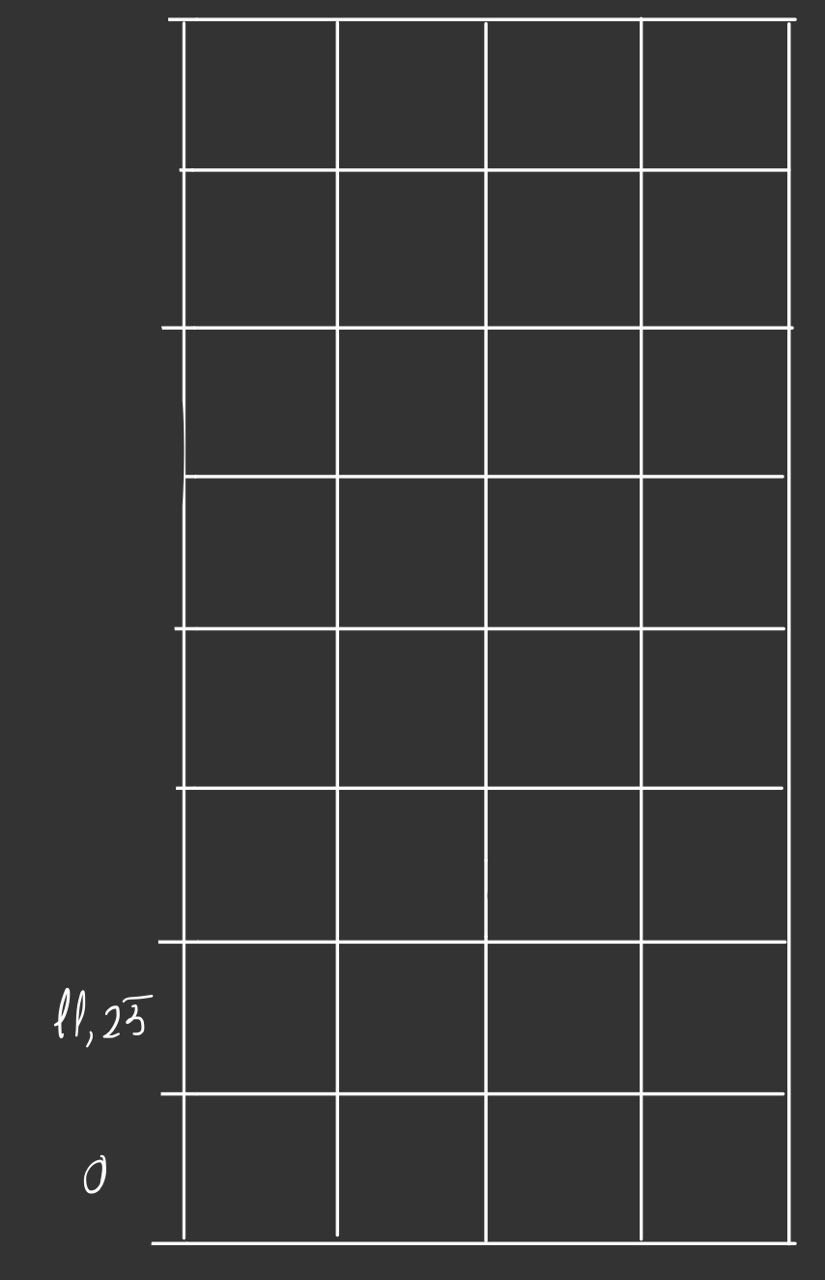

sappiamo la lunghezza anche delle celle della prima e ultima riga, le possiamo facilmente ottenere facendo 20cm/n_colonne e 45cm/n_colonne

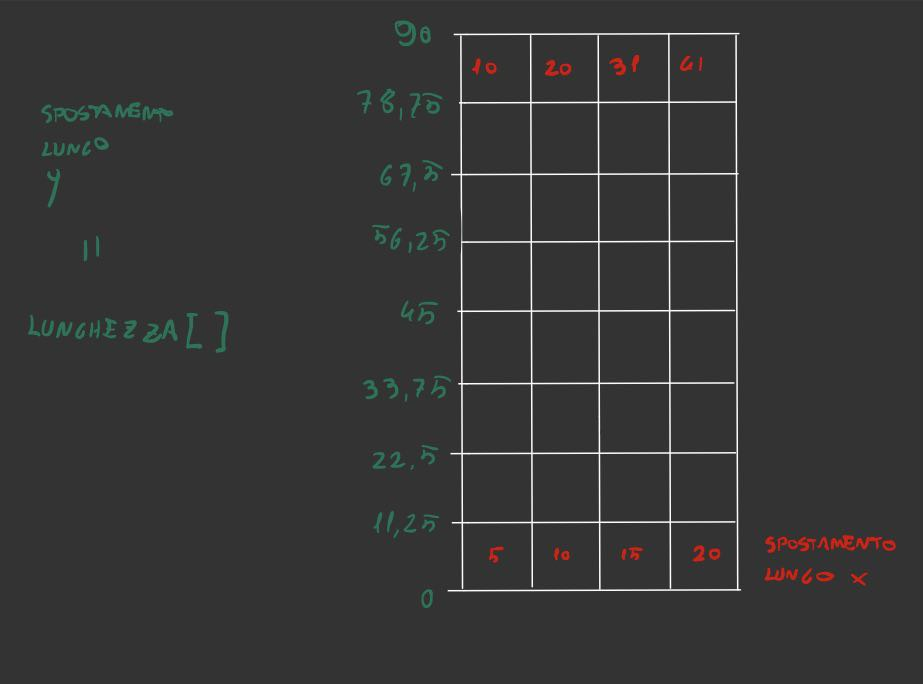

ho poi calcolato il vettore delle larghezze[] ossia la distanza massima di ogni settore lungo x; conosciamo già il suo valore agli estremi, rispettivamente 20cm e 45cm, quindi caloclando la retta passante per questi due punti otteniamo i valori intermedi

Sapendo che il trapezio descritto ha una dimensione di 90cm per la base superiore e 40cm per quella inferiore, ho immaginato di ridurre il problema tagliandolo a metà nella direzione dell'altezza, calcolando solo metà dei coefficienti, per poi ottenere l'altra metà per simmetria, cambiandogli il segno. 
La y (ovvero l'altezza del trapezio, anch'essa di 90cm) è stata divisa in 8, ottenendo quindi tanti segmenti di 11.25cm
Per il calcolo della x, poiché questa varia man mano che ci si allontana dal sensore, ho calcolato la retta passante per due punti ((x-x1)/(x2-x1))=((y-y1)/(y2-y1)) rispettivamente con x1=20, y1=0, x2=45, y2=90.

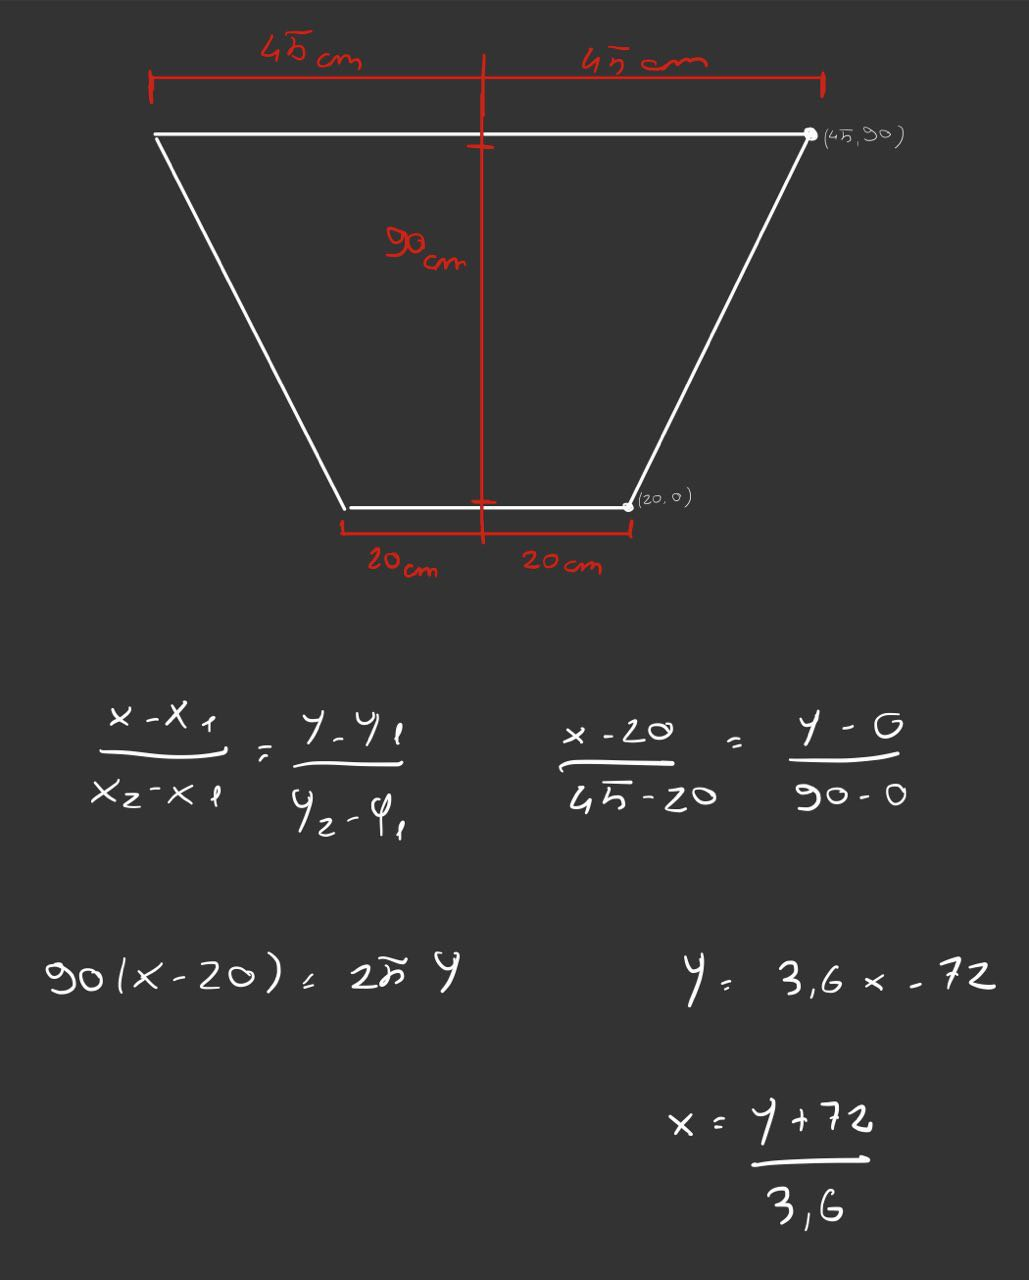

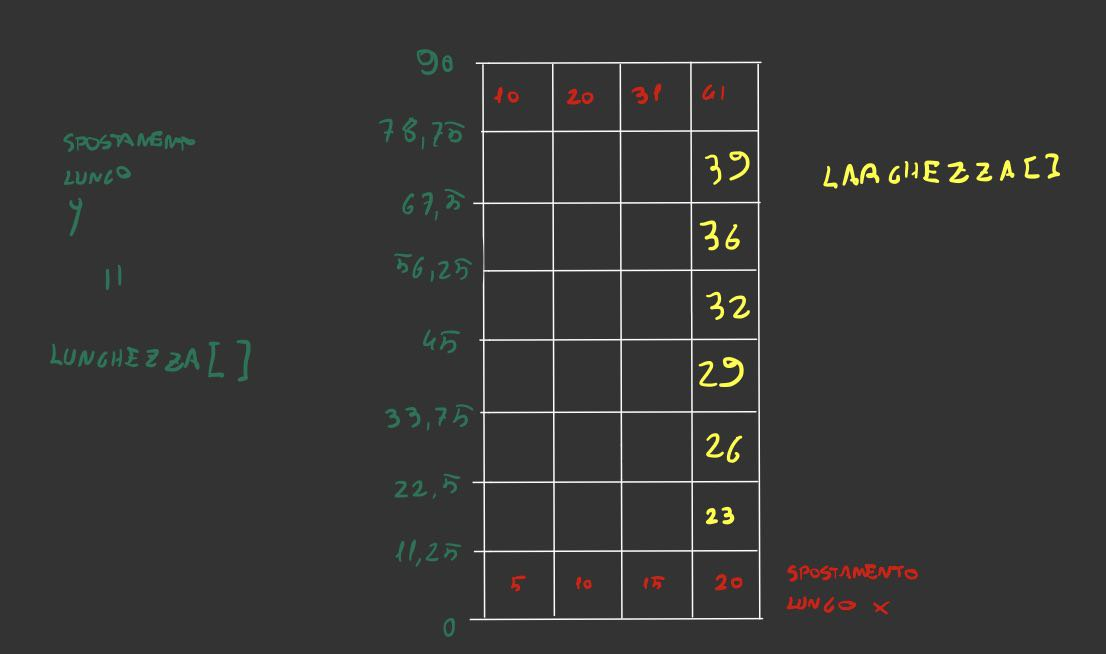

infine, basta prendere i valori agli estremi, dividerli per il numero di colonne e moltiplicare il valore per l'indice di colonna + 1, e ottenere così la matrice completa

poiché la matrice ha le righe invertite rispetto a come ci servono, utilizziamo il metodo inverti_righe per riportarle alla 
forma più comoda per noi

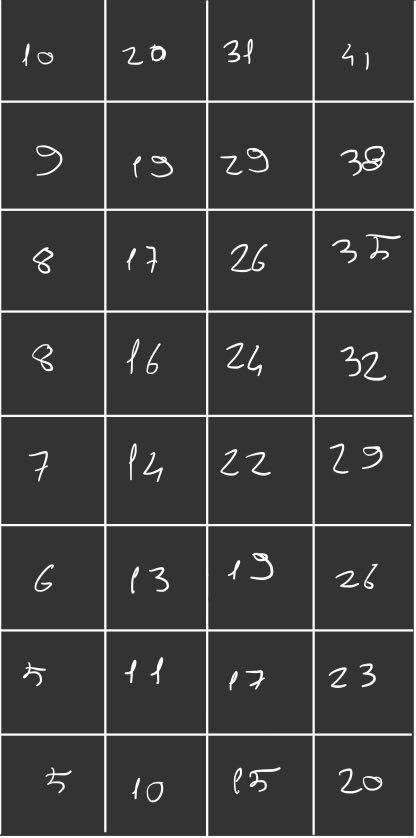

per ottenere la matrice completa ci serve ribaltare la matrice ottenuta, questa volta rispetto alle colonne, e cambiare ogni elemento di segno; questo procedimento viene effettuato da creaMatriceRibaltataNegativa, il risultato è il seguente

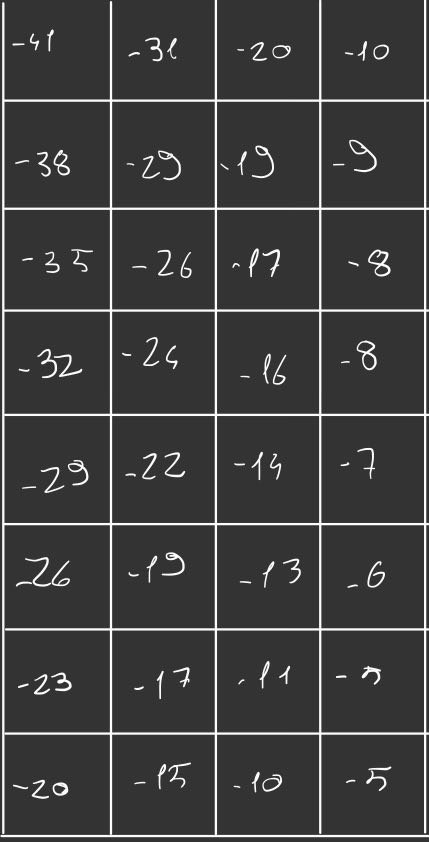

concatenando le due matrici si ottiene quella completa

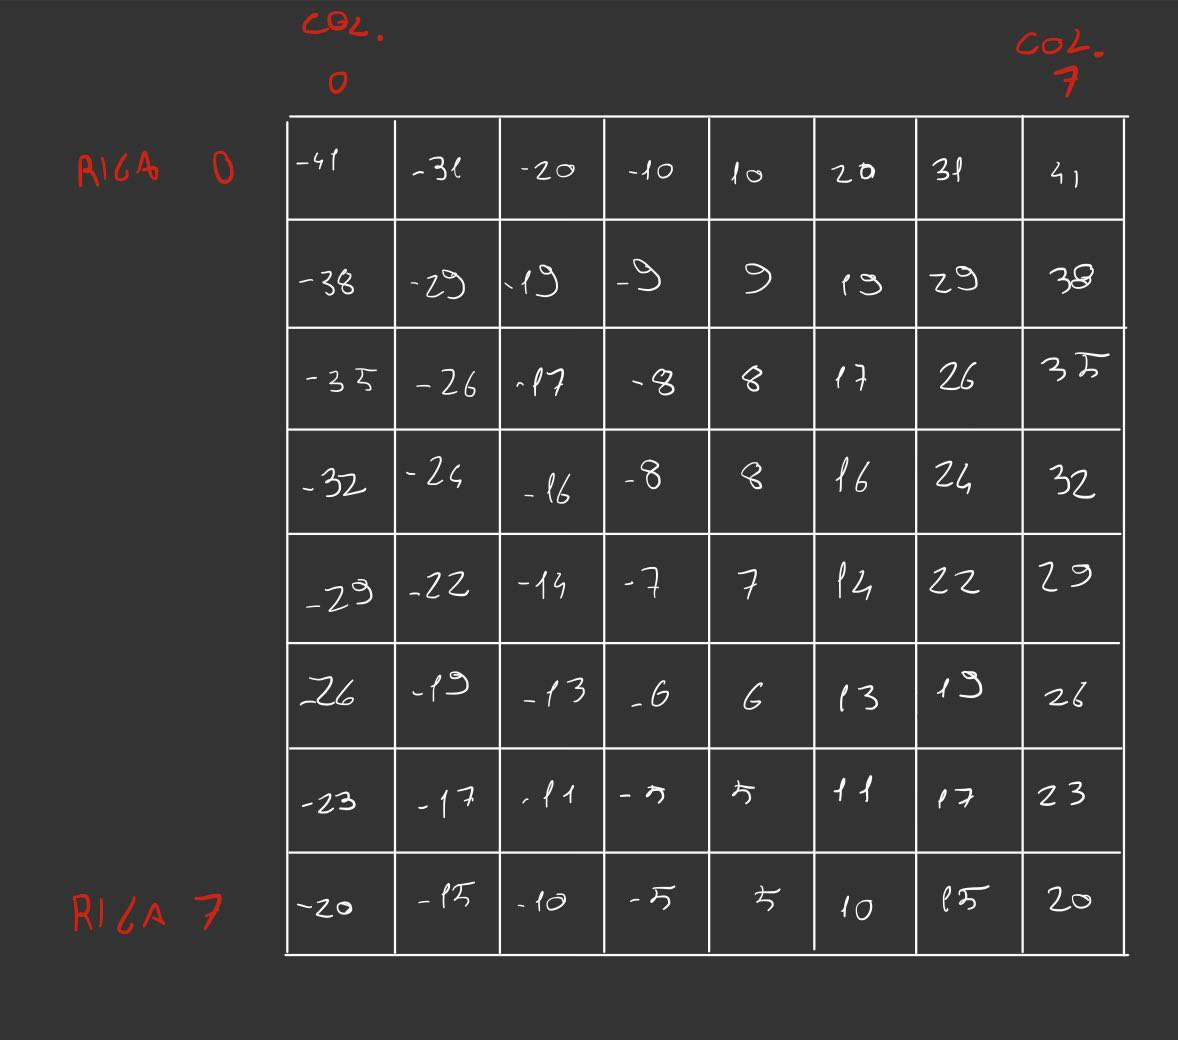

A questo punto, abbiamo ricavato lo spostamento del robot lungo x e lungo y

se prendiamo l'immagine vista dal robot, la dividiamo in una matrice 8x8, (visibile per esempio nel file palla_with_lines.avi) composta da 64 settori e la sovrapponiamo a questa

avendo addestrato la rete a trovare la palla all'interno dell'immagine, siamo in grado di far muovere il robot lungo x e lungo y della quantità che abbiamo calcolato, dopo esserci accertati che il settore sia quello giusto effettuando varie volte il controllo e salvando le informazioni su quel settore in una mappa, la cui chiave è la concatenazione della x e della y, mentre il valore è il numero di volte che quel quadrante viene scelto come contenitore della palla; appena il valore di una chiave arriva a 10, il robot si muove verso quel quadrante grazie ai coefficienti della matrice

Il codice contiene alcune parti commentate o scommentate per effettuare dei test;
per utilizzarlo su un video non bisogna modificare nulla;
per utilizzarlo su un robot è utile commentare la riga 147 che fa aspettare un secondo
tra un acquisizione e la successiva e decommentare le righe da 168 a 172 per ottenere il movimento effettivo del robot.
